<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-Isaias-Hernandez/blob/main/Sep8-9/ejercicio_sep9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
cars = pd.read_csv("/content/drive/MyDrive/ML2023/CarPrice_Assignment.csv", delimiter=',')
cars

In [63]:
cars_numericas = cars.select_dtypes(include=[np.number])
cars_numericas = cars_numericas.drop(columns=["price"])
cars_categoricas = cars.select_dtypes(exclude=[np.number])

columnas_categoricas = cars_categoricas.columns
columnas_numericas = cars_numericas.columns

columnas_categoricas = columnas_categoricas.tolist()
columnas_numericas = columnas_numericas.tolist()

t = cars["price"]

Graficar las variables contra el precio
_________________

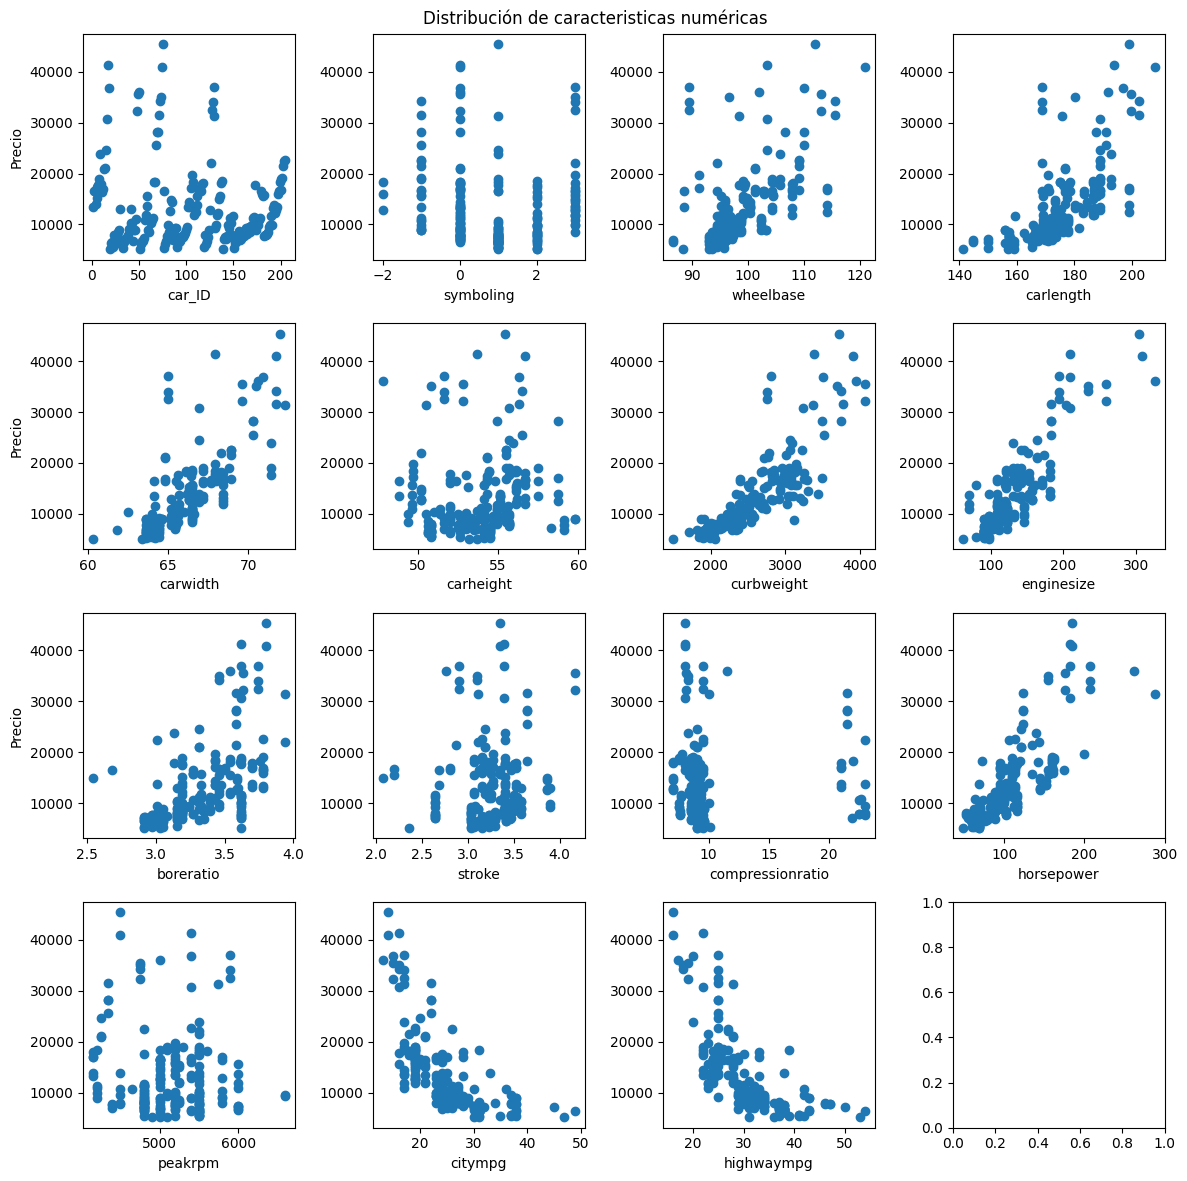

In [64]:
# variables numericas
fig, ax = plt.subplots(4, 4, figsize=(12, 12))
j = 0
k = 0
for i in range(len(columnas_numericas)):
  # print(i, j, k)
  ax[j, k].scatter(cars_numericas[columnas_numericas[i]], t)
  ax[j, k].set_xlabel(columnas_numericas[i])
  k += 1
  if k%4 == 0:
    ax[j, 0].set_ylabel("Precio")
    k = 0
    j += 1

fig.suptitle("Distribución de caracteristicas numéricas")
plt.tight_layout()

plt.show()

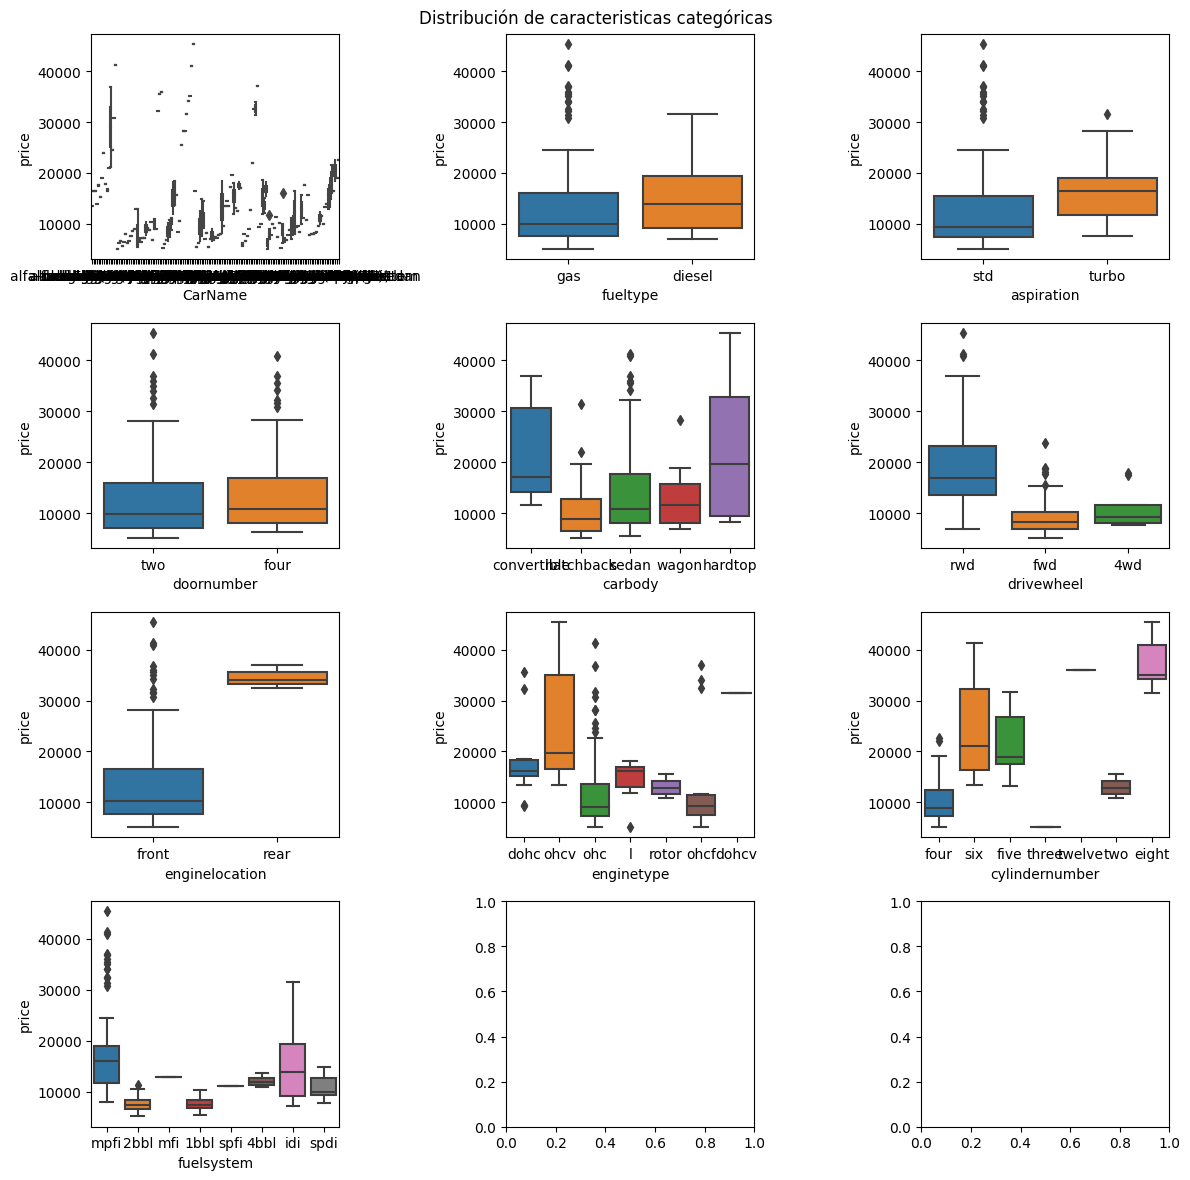

In [91]:
# variables categoricas

fig, ax = plt.subplots(4, 3, figsize=(12, 12))
j = 0
k = 0
for i in range(len(columnas_categoricas)):
  sns.boxplot(ax=ax[j, k], data=cars, x=columnas_categoricas[i], y="price")
  #print(i, j, k)
  k += 1
  if k%3 == 0:
    #ax[j, 0].set_ylabel("Precio")
    k = 0
    j += 1

fig.suptitle("Distribución de caracteristicas categóricas")
plt.tight_layout()

plt.show()

In [93]:
#Falta modificar la columna de nombras para que sea de marcas - utilizar función splice para tener únicamente la marca

Seleccionar las variables que quiero para el modelo
___________________

In [92]:
columnas_numericas

['car_ID',
 'symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

In [94]:
columnas_categoricas

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [35]:
#df=df[use_vars]
df=pd.get_dummies(cars, columns=cars_cat)
df.shape

(205, 201)

In [8]:
#Usando KERAS
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD